# Voronoi Graphs

In [1]:
# Make the relevant imports including Voronoi methods
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

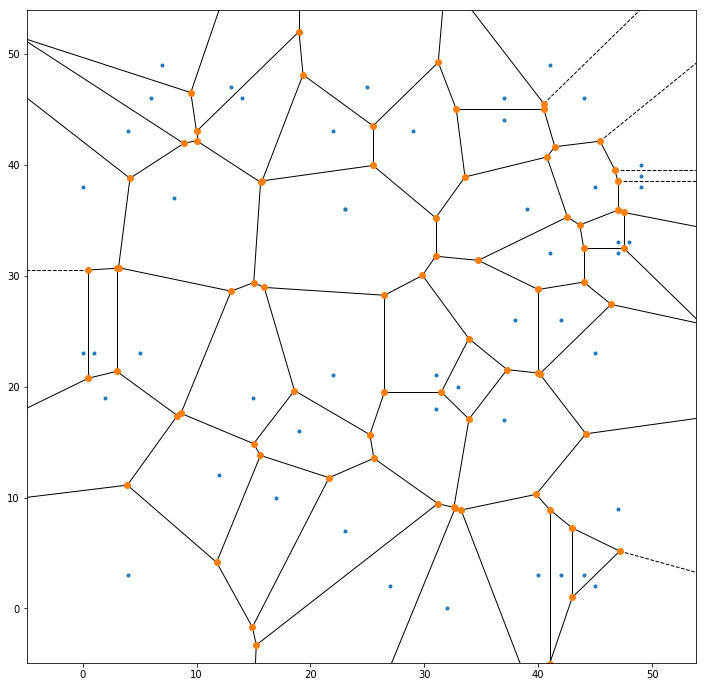

In [3]:

# Recreate the figure above for a new set of random points
points = np.random.randint(50, size=(50, 2))
graph = Voronoi(points)
voronoi_plot_2d(graph)
plt.show()

Note that some "vertices" might be outside the bounding box of the obstacle points!

In [4]:
# Read in the obstacle data
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

In [5]:
# If you want to use the prebuilt bresenham method
# Import the Bresenham package
from bresenham import bresenham

In [26]:
# # Here you'll modify the `create_grid()` method from a previous exercise
# # In this new function you'll record obstacle centres and
# # create a Voronoi graph around those points
# def create_grid_and_edges(data, drone_altitude, safety_distance):
#     """
#     Returns a grid representation of a 2D configuration space
#     along with Voronoi graph edges given obstacle data and the
#     drone's altitude.
#     """

#     # minimum and maximum north coordinates
#     north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
#     north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

#     # minimum and maximum east coordinates
#     east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
#     east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

#     # given the minimum and maximum coordinates we can
#     # calculate the size of the grid.
#     north_size = int(np.ceil((north_max - north_min)))
#     east_size = int(np.ceil((east_max - east_min)))

#     # Initialize an empty grid
#     grid = np.zeros((north_size, east_size))
#     # Center offset for grid
#     north_min_center = np.min(data[:, 0])
#     east_min_center = np.min(data[:, 1])
    
#     # Define a list to hold Voronoi points
#     points = []
#     # Populate the grid with obstacles
#     for i in range(data.shape[0]):
#         north, east, alt, d_north, d_east, d_alt = data[i, :]

#         if alt + d_alt + safety_distance > drone_altitude:
#             obstacle = [
#                 int(north - d_north - safety_distance - north_min_center),
#                 int(north + d_north + safety_distance - north_min_center),
#                 int(east - d_east - safety_distance - east_min_center),
#                 int(east + d_east + safety_distance - east_min_center),
#             ]
#             grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1
            
#             # add center of obstacles to points list
#             points.append([north - north_min, east - east_min])

#     # TODO: create a voronoi graph based on
#     # location of obstacle centres
#     graph = Voronoi(points)

#     # TODO: check each edge from graph.ridge_vertices for collision
#     edges = []
#     for vv in graph.ridge_vertices:
#         v1 = graph.vertices[vv[0]]
#         v2 = graph.vertices[vv[1]]
        
#         # TODO: these are not integer coordinates
#         # idea: use the coordinates of the grid cells in which the vertices lie
#         # this might shift the trajectory!
#         crossed_cells = list(bresenham(int(v1[0]), int(v1[1]), int(v2[0]), int(v2[1])))

#         # TODO: also, these vertices might be out-of-bounds
#         # idea: filter the cells that are outside the grid
#         in_collision = any(grid[c[0]][c[1]] == 1 for c in crossed_cells 
#                           if c[0] >= 0 and c[0] < grid.shape[0]
#                          and c[1] >= 0 and c[1] < grid.shape[1])

#         if not in_collision:
#             v1 = (v1[0], v1[1])
#             v2 = (v2[0], v2[1])
#             edges.append((v1, v2))
    

#     return grid, edges

In [61]:
# Here you'll modify the `create_grid()` method from a previous exercise
# In this new function you'll record obstacle centres and
# create a Voronoi graph around those points
def create_grid_and_edges(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    along with Voronoi graph edges given obstacle data and the
    drone's altitude.
    """
    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Initialize an empty list for Voronoi points
    points = []
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1
            # add center of obstacles to points list
            points.append([north - north_min, east - east_min])

    # DONE: create a voronoi graph based on
    # location of obstacle centres
    graph = Voronoi(points)

    # DONE: check each edge from graph.ridge_vertices for collision
    edges = []

    for vv in graph.ridge_vertices:
        v1 = graph.vertices[vv[0]]
        v2 = graph.vertices[vv[1]]
        
        # DONE: these are not integer coordinates
        # idea: use the coordinates of the grid cells in which the vertices lie
        # this might shift the trajectory!
        crossed_cells = list(bresenham(int(v1[0]), int(v1[1]), int(v2[0]), int(v2[1])))

        # DONE: also, these vertices might be out-of-bounds
        # idea: filter the cells that are outside the grid
#         in_collision = any(grid[c[0]][c[1]] == 1 for c in crossed_cells 
#                           if c[0] >= 0 and c[0] < grid.shape[0]
#                          and c[1] >= 0 and c[1] < grid.shape[1])

        # NOTE: the preceding expression leads to wrong results:
        # 1. there were negative coordinates remaining
        # 2. the edge count was slightly higher
        # 3. the plot showed negative N values and two solid blue lines
        #    along the positive E and negative N axes        
        # TODO: Why?

        in_collision = False
    
        for c in crossed_cells:
            # check out-of-bounds
            if np.amin(c) < 0 or c[0] >= grid.shape[0] or c[1] >= grid.shape[1]:
                in_collision = True
                break
                
            # check if obstacle
            if grid[c[0], c[1]] == 1:
                in_collision = True
                break

        if not in_collision:
            v1 = (v1[0], v1[1])
            v2 = (v2[0], v2[1])
            edges.append((v1, v2))
    

    return grid, edges

In [62]:
# Define a flying altitude (feel free to change this)
drone_altitude = 5
safety_distance = 3
grid, edges = create_grid_and_edges(data, drone_altitude, safety_distance)
print('Found %5d edges' % len(edges))

Found  1895 edges


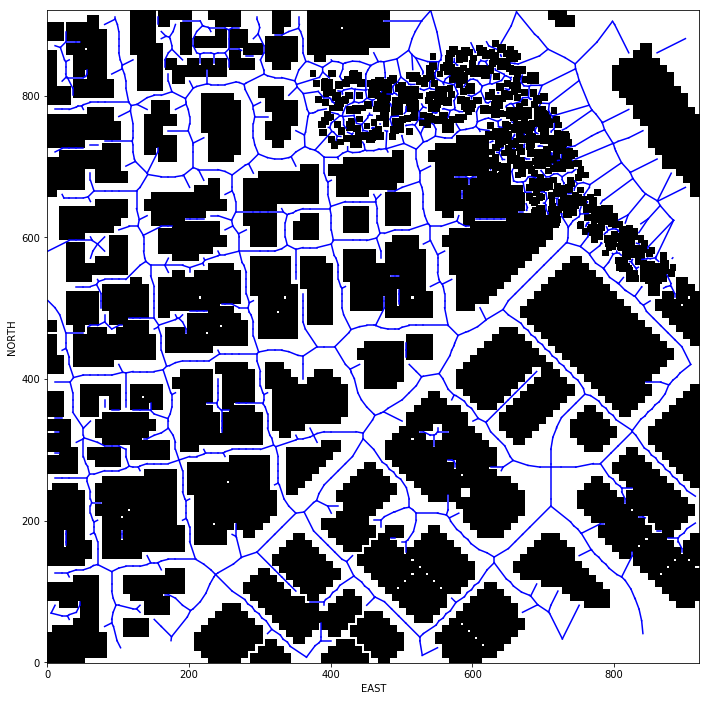

In [63]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
# Plot it up!
plt.imshow(grid, origin='lower', cmap='Greys') 

# Stepping through each edge
for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Voronoi-Solution.ipynb)